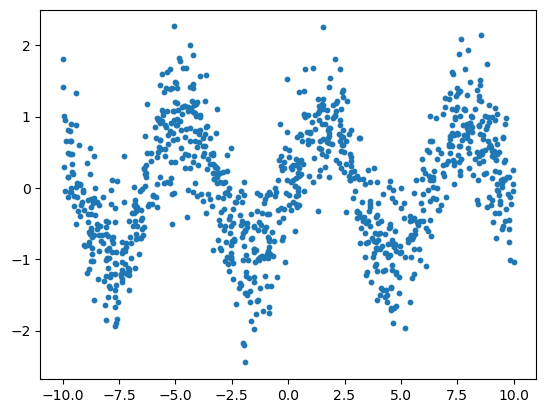

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Set a seed for reproducibility
np.random.seed(0)

# Generate synthetic data for training
X = np.random.uniform(-10, 10, 1000).astype(np.float32) 
y = (np.sin(X) + np.random.normal(0, 0.5, 1000)).astype(np.float32) 

# Generate synthetic data for testing
X_test = np.random.uniform(-10, 10, 200).astype(np.float32)
y_test = (np.sin(X_test) + np.random.normal(0, 0.5, 200)).astype(np.float32)

# Plot the training data
plt.scatter(X, y, s=10)
plt.show()

In [38]:
W_cos = tf.Variable(np.random.randn(10, 1)*0.01, dtype=tf.float32)
W_sin = tf.Variable(np.random.randn(10, 1)*0.01, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

# Fourier series function
def fourier_series(X):
    X = tf.reshape(X, [-1, 1])
    terms_cos = tf.cos(tf.range(1, 11, dtype=tf.float32) * X) * tf.transpose(W_cos)
    terms_sin = tf.sin(tf.range(1, 11, dtype=tf.float32) * X) * tf.transpose(W_sin)
    return tf.squeeze(tf.reduce_sum(terms_cos + terms_sin, axis=1)) + b

# Mean square error cost function
def cost_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training loop
for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = fourier_series(X)
        cost = cost_function(y_pred, y)
    
    # Calculate gradients
    gradients = tape.gradient(cost, [W_cos, W_sin, b])
    
    # Update W and b
    optimizer.apply_gradients(zip(gradients, [W_cos, W_sin, b]))
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost {cost.numpy()}")

# Plot the training data and the model prediction


Epoch 0, Cost 0.7123576402664185
Epoch 100, Cost 0.29313984513282776
Epoch 200, Cost 0.2364334762096405
Epoch 300, Cost 0.22816091775894165
Epoch 400, Cost 0.22687283158302307
Epoch 500, Cost 0.22666123509407043
Epoch 600, Cost 0.226624995470047
Epoch 700, Cost 0.22661855816841125
Epoch 800, Cost 0.22661739587783813
Epoch 900, Cost 0.22661718726158142


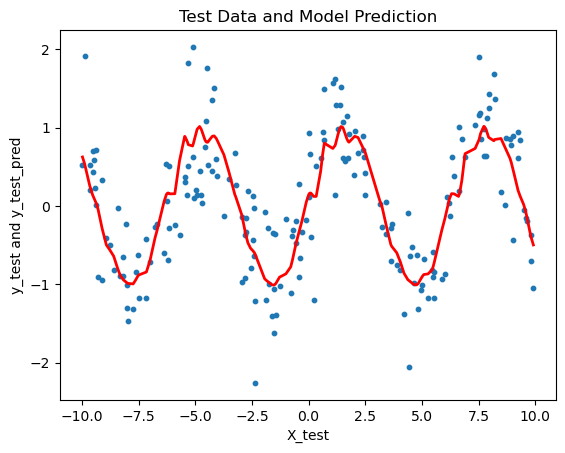

In [39]:
plt.scatter(X_test, y_test, s=10)
plt.plot(np.sort(X_test), fourier_series(np.sort(X_test)).numpy(), color='red', linewidth=2)
plt.title('Test Data and Model Prediction')
plt.xlabel('X_test')
plt.ylabel('y_test and y_test_pred')
plt.show()